As a data analyst, your task is to explore and analyze this customer dataset to uncover valuable insights for the bank's decision-making process. You will focus on understanding the demographic and financial characteristics of the bank's customers, identifying trends and patterns in customer engagement, and highlighting potential areas for business improvement (e.g., customer retention or service optimization).

#### Objectives
--Get the data for each customer and accounts
--Examine and profile the data
--Prepare for visualisation
--Draw conclusion and recommendation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
customer_df = pd.read_csv('Bank_Churn_Messy.xlsx - Customer_Info.csv')
accounts_df = pd.read_csv('Bank_Churn_Messy.xlsx - Account_Info.csv')

In [3]:
#### Data Cleaning
#### Duplicates
customer_df.duplicated().sum()

1

In [4]:
#### Duplicates
accounts_df.duplicated().sum()

2

In [5]:
#### Drop Duplicates
customer_df.drop_duplicates(inplace=True)
accounts_df.drop_duplicates(inplace=True)

In [6]:
#### Merging Data
merged_df = customer_df.merge(accounts_df)

In [7]:
merged_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
2,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0


In [8]:
merged_df.shape

(10000, 13)

In [9]:
#### Data Cleaning Continued
#### Null Values
merged_df.isnull().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure             0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
dtype: int64

In [10]:
#### Fill age with mean age, ignore name
mean_age = merged_df['Age'].mean()
merged_df['Age'] = merged_df['Age'].fillna(mean_age)

In [11]:
merged_df.isnull().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
dtype: int64

In [12]:
#### Replace misspelt words in geography column
merged_df['Geography'] = merged_df['Geography'].replace({'FRA' : 'France', 'French' : 'France'})

In [13]:
merged_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
2,15619304,Onio,502,France,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
3,15701354,Boni,699,France,Female,39.0,1,€93826.63,€0.0,2,No,No,0
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39.0,5,€96270.64,€0.0,2,No,No,0
9996,15569892,Johnstone,516,France,Male,35.0,10,€101699.77,€57369.61,1,Yes,Yes,0
9997,15584532,Liu,709,France,Female,36.0,7,€42085.58,€0.0,1,Yes,Yes,1
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,No,1


In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  object 
 8   Balance          10000 non-null  object 
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1015.8+ KB


In [15]:
#### Change Age fron float64 to int64
merged_df['Age'] = merged_df['Age'].round().astype('int64')

In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerId       10000 non-null  int64 
 1   Surname          9997 non-null   object
 2   CreditScore      10000 non-null  int64 
 3   Geography        10000 non-null  object
 4   Gender           10000 non-null  object
 5   Age              10000 non-null  int64 
 6   Tenure           10000 non-null  int64 
 7   EstimatedSalary  10000 non-null  object
 8   Balance          10000 non-null  object
 9   NumOfProducts    10000 non-null  int64 
 10  HasCrCard        10000 non-null  object
 11  IsActiveMember   10000 non-null  object
 12  Exited           10000 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 1015.8+ KB


In [17]:
#### save cleaned up data
merged_df.to_csv('BankChurn_cleaned.csv')

In [18]:
#### Prepare Data For Analysis
def categorize_exited(value):
 if value == 1:
  return 'Yes'
 else:
    return 'No'
merged_df['Exited Category'] = merged_df['Exited'].apply(categorize_exited)


In [19]:
merged_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Exited Category
0,15634602,Hargrave,619,France,Female,42,2,€101348.88,€0.0,1,Yes,Yes,1,Yes
1,15647311,Hill,608,Spain,Female,41,1,€112542.58,€83807.86,1,Yes,Yes,0,No
2,15619304,Onio,502,France,Female,42,8,€113931.57,€159660.8,3,No,No,1,Yes
3,15701354,Boni,699,France,Female,39,1,€93826.63,€0.0,2,No,No,0,No
4,15737888,Mitchell,850,Spain,Female,43,2,€79084.1,€125510.82,1,Yes,Yes,0,No


In [52]:
#### Helper Functions
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10)).patch.set_facecolor('none')

def generate_bar_plot(x,y,xlabel,ylabel):
    plt.bar(x,y,color = 'brown',edgecolor ='black')
    plt.title(f'plot of {ylabel} against {xlabel}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

    def generate_line_plot(x,y,xlabel,ylabel,data):
        sb.lineplot(x,y,data=data)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(f'plot of how {ylabel} changes with {xlabel}')
        sb.despine()
        plt.show()

    def plot_pie(values,labels,colors):
        plt.pie(values,labels=labels,autopct='%.0f%%', colors=['taupe', 'light brown', 'dark brown'])
        plt.show()

<Figure size 2000x1000 with 0 Axes>

In [21]:
### list comprehension for colums with object data types
cat_col = [col for col in merged_df.select_dtypes(['object']).columns]

In [22]:
for col in cat_col:
    print(merged_df[col].value_counts())
    print ('-------------')

Surname
Smith       32
Martin      29
Scott       29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64
-------------
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
-------------
Gender
Male      5457
Female    4543
Name: count, dtype: int64
-------------
EstimatedSalary
-€999999      3
€24924.92     2
€101348.88    1
€10288.24     1
€72500.68     1
             ..
€188377.21    1
€55902.93     1
€4523.74      1
€102195.16    1
€38190.78     1
Name: count, Length: 9997, dtype: int64
-------------
Balance
€0.0          3617
€130170.82       2
€105473.74       2
€85304.27        1
€159397.75       1
              ... 
€81556.89        1
€112687.69       1
€108698.96       1
€238387.56       1
€130142.79       1
Name: count, Length: 6382, dtype: int64
-------------
HasCrCard
Yes    5151
No     4849
Name: count, dtype: int64
-------------
IsActiv

In [23]:
#### list comprehension for columns with numeric data type
num_col = [col for col in merged_df.select_dtypes(['int64', 'float64']).columns]

In [24]:
for col in num_col:
    print(merged_df[col].value_counts())
    print('------------')

CustomerId
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: count, Length: 10000, dtype: int64
------------
CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64
------------
Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64
------------
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64
------------
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64
------------
Exited
0    7963
1    2037
Name: count, dtype: int64
------------


In [25]:
#### Data Analysis
### Question 1
### What percentage of customers have churned?

Exited_cat = (merged_df.groupby('Exited Category').agg({'Exited Category':'count'}))

In [26]:
Exited_cat

,Exited Category
Exited Category,
No,7963
Yes,2037


In [38]:
#### Generate Piechart
def    plot_pie(values,labels,colors):
       plt.pie(values,labels=labels,autopct='%.0f%%', colors=['lightbrown', 'Darkbrown'])
       plt.show()
      

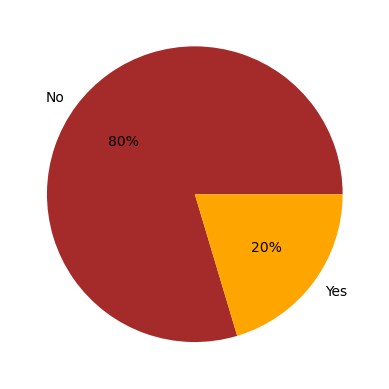

In [83]:
plt.pie(Exited_cat['Exited Category'], labels=Exited_cat.index, autopct='%.0f%%', colors=['brown','orange'])
plt.show()

In [ ]:
Result: 20% of the bank customers (2000) has churned

In [40]:
##### Question 2
#### Customer spread across geographical location
Geographical_cat = (merged_df.groupby('Geography').agg({'Geography':'count'}))

In [41]:
Geographical_cat

,Geography
Geography,
France,5014
Germany,2509
Spain,2477


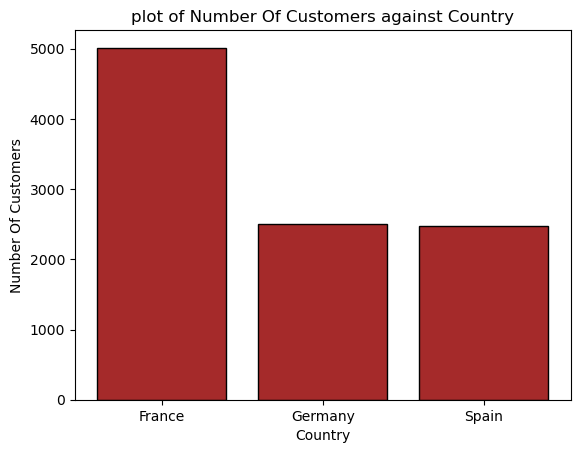

In [53]:
generate_bar_plot(Geographical_cat.index, Geographical_cat['Geography'], 'Country', 'Number Of Customers')

In [ ]:
Result: france has the highest customers base.

In [74]:
#### Question 3
#### Customer Exit by Country
geographical_exit=merged_df.groupby(['Geography','Exited Category']).size().unstack(fill_value=0)

In [69]:
geographical_exit

Exited Category,No,Yes
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [ ]:
def 

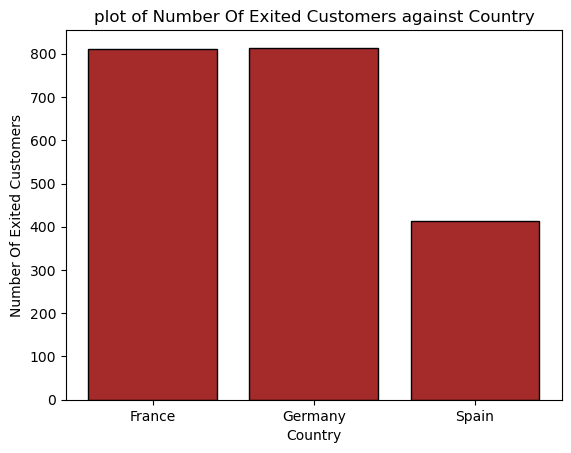

In [80]:
generate_bar_plot(geographical_exit.index, geographical_exit['Yes'], 'Country', 'Number Of Exited Customers')

In [81]:
#### Question 4
#### Customer exit by Gender
gender_exit=merged_df.groupby(['Gender','Exited Category']).size().unstack(fill_value=0)

In [82]:
gender_exit

Exited Category,No,Yes
Gender,,
Female,3404,1139
Male,4559,898


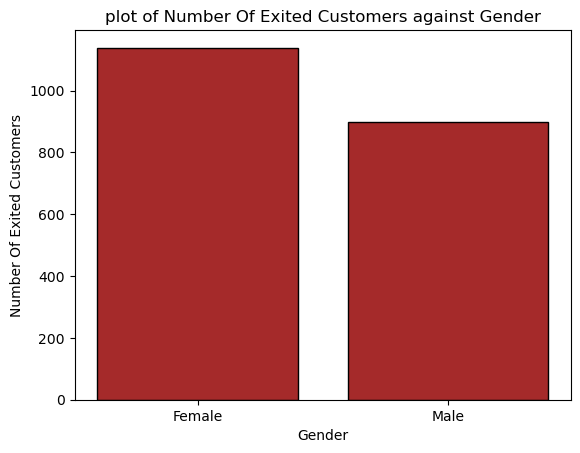

In [84]:
generate_bar_plot(gender_exit.index, gender_exit['Yes'], 'Gender', 'Number Of Exited Customers')

In [ ]:
Result: more females churned than males

In [91]:
#### Question 5
#### Cresit score for Exited customers and Retained customers
exited_customers=merged_df[merged_df['Exited'] ==1]

In [92]:
exited_customers

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Exited Category
0,15634602,Hargrave,619,France,Female,42,2,€101348.88,€0.0,1,Yes,Yes,1,Yes
2,15619304,Onio,502,France,Female,42,8,€113931.57,€159660.8,3,No,No,1,Yes
5,15574012,Chu,645,Spain,Male,44,8,€149756.71,€113755.78,2,No,No,1,Yes
7,15656148,Obinna,376,Germany,Female,29,4,€119346.88,€115046.74,4,No,No,1,Yes
16,15737452,Romeo,653,Germany,Male,58,1,€5097.67,€132602.88,1,No,No,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,15672754,Burbidge,498,Germany,Male,42,3,€53445.17,€152039.7,1,Yes,Yes,1,Yes
9982,15768163,Griffin,655,Germany,Female,46,7,€115146.4,€137145.12,1,No,No,1,Yes
9991,15769959,Ajuluchukwu,597,France,Female,53,4,€69384.71,€88381.21,1,No,No,1,Yes
9997,15584532,Liu,709,France,Female,36,7,€42085.58,€0.0,1,Yes,Yes,1,Yes


In [93]:
credit_score_exited=exited_customers['CreditScore']

In [94]:
credit_score_exited.head()

0     619
2     502
5     645
7     376
16    653
Name: CreditScore, dtype: int64

In [95]:
credit_score_exited.tail()

9981    498
9982    655
9991    597
9997    709
9998    772
Name: CreditScore, dtype: int64

In [97]:
creditscore_exit_desc= exited_customers[['CustomerId', 'CreditScore']].sort_values(by='CreditScore', ascending=False)

In [98]:
creditscore_exit_desc.head()

,CustomerId,CreditScore
3251,15750335,850
2393,15657342,850
7837,15678497,850
6403,15736126,850
4629,15687153,850


In [108]:
creditscore_exit.describe()

,CustomerId,CreditScore,Age,Tenure,NumOfProducts,Exited
count,2.037000e+03,2037.000000,2037.000000,2037.000000,2037.000000,2037.0
mean,1.569005e+07,645.351497,44.837997,4.932744,1.475209,1.0
std,7.269262e+04,100.321503,9.761562,2.936106,0.801521,0.0
min,1.556571e+07,350.000000,18.000000,0.000000,1.000000,1.0
25%,1.562736e+07,578.000000,38.000000,2.000000,1.000000,1.0
50%,1.568896e+07,646.000000,45.000000,5.000000,1.000000,1.0
75%,1.575309e+07,716.000000,51.000000,8.000000,2.000000,1.0
max,1.581566e+07,850.000000,84.000000,10.000000,4.000000,1.0


In [104]:
avg_credit_by_exit=merged_df.groupby('Exited')['CreditScore'].mean()


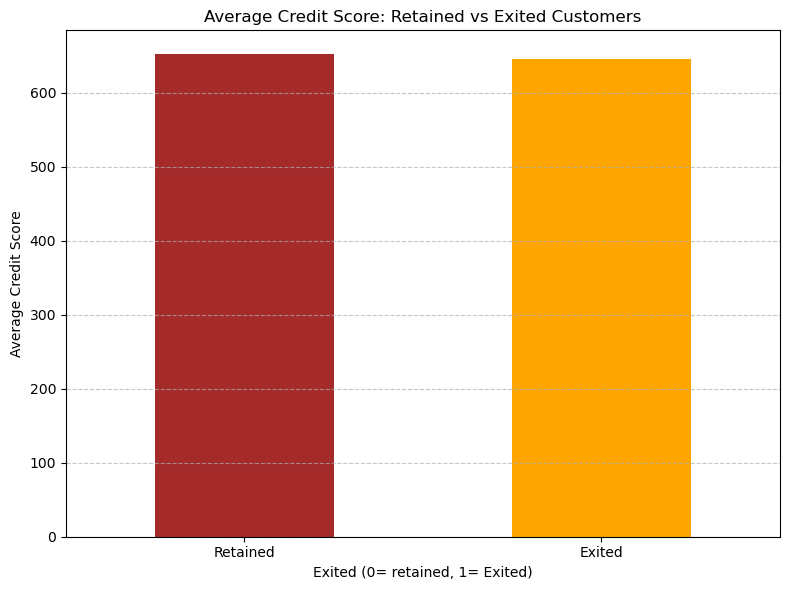

In [107]:
avg_credit_by_exit.plot(kind='bar', color=['brown', 'orange'], figsize=(8,6))
plt.title('Average Credit Score: Retained vs Exited Customers')
plt.xlabel('Exited (0= retained, 1= Exited)')
plt.ylabel('Average Credit Score')
plt.xticks(ticks=[0,1], labels=['Retained', 'Exited'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [109]:
#### Question6
#### What age group has the highest churn rate?
age_exit=merged_df.groupby(['Age','Exited Category']).size().unstack(fill_value=0)

In [111]:
age_exit

Exited Category,No,Yes
Age,,
18,20,2
19,26,1
20,38,2
21,50,3
22,72,12
...,...,...
83,1,0
84,1,1
85,1,0


In [121]:
#### create age categories
merged_df['Agegroup'] = pd.cut(merged_df['Age'], bins=[18, 30, 40, 50, 60, 90, ], labels=['18-30', '31-40', '41-50', '51-60', '60+'])


C:\Users\Admin\AppData\Local\Temp\ipykernel_10172\1212065520.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby('Agegroup')['Exited'].mean().plot(kind='bar', color='brown')


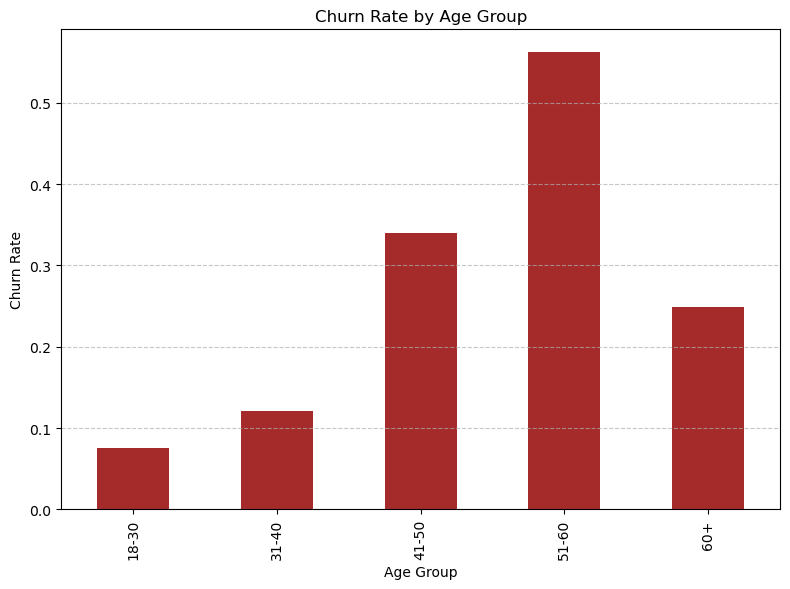

In [127]:
plt.figure(figsize=(8,6))
merged_df.groupby('Agegroup')['Exited'].mean().plot(kind='bar', color='brown')
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
Result: Those in age group 51-60 years has the highest churn rate

In [128]:
#### Question 7
#### does tenure lenght affect the churn rate?
churn_by_tenure =merged_df.groupby('Tenure')['Exited'].mean()

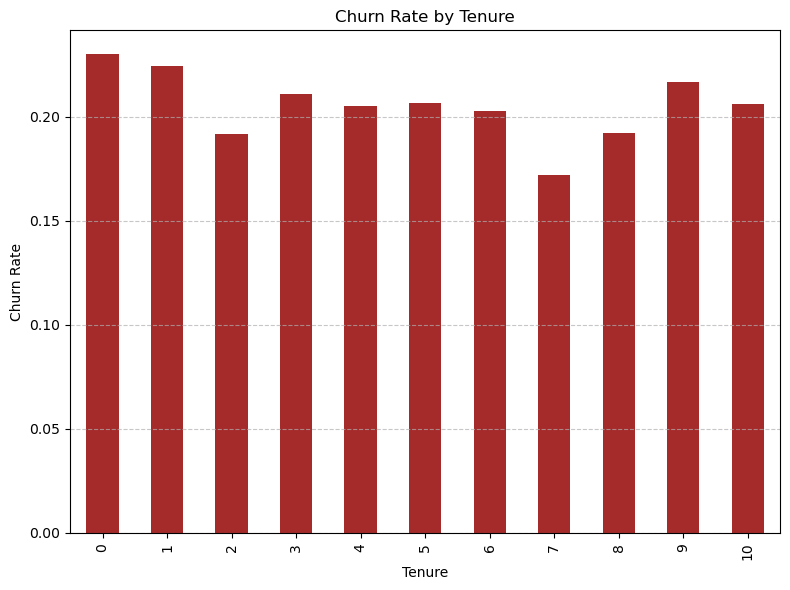

In [129]:
plt.figure(figsize=(8,6))
churn_by_tenure.plot(kind='bar', color='brown')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
Result: churn rate is high across all tenure length with year 0 nd 1 having the highest rate.